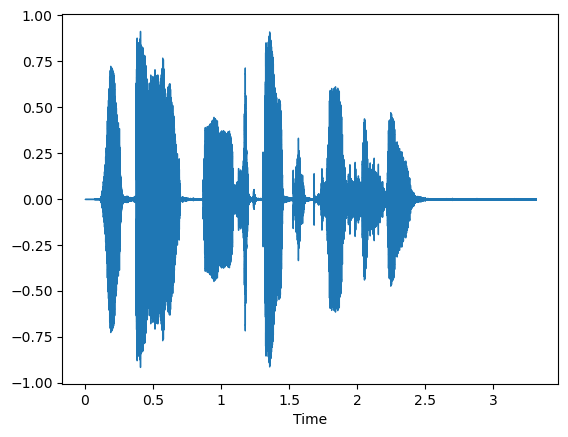

In [68]:
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
speech_signal , sr = librosa.load(r"C:\Users\HP\Downloads\speech processing.mp3")
librosa.display.waveshow(speech_signal)

In [99]:
speech = np.fft.fft(speech_signal)

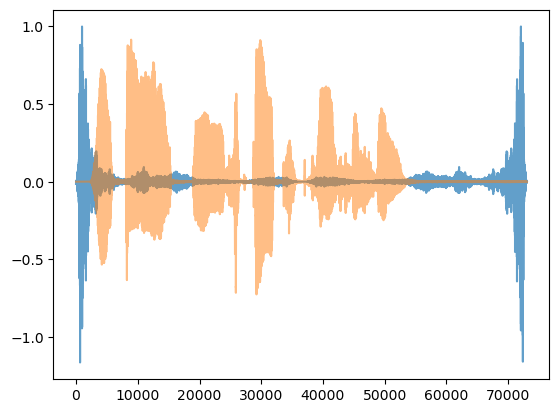

In [115]:
fig, ax = plt.subplots()
ax.plot(speech/np.max(speech), alpha=0.7)
ax.plot(speech_signal, alpha=0.5)

In [113]:
Audio(speech, rate=sr)

C:\Users\HP\anaconda3\New folder\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


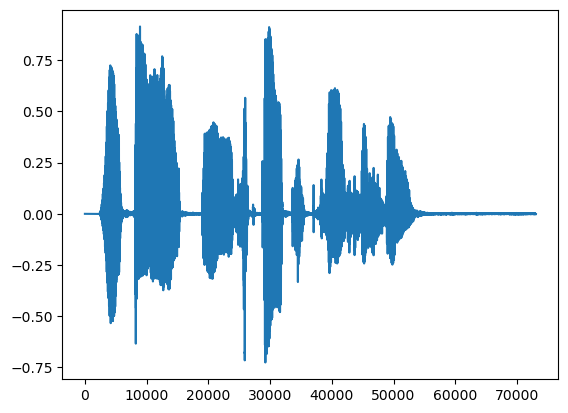

In [118]:
inverse_speech = np.fft.ifft(speech)
plt.plot(inverse_speech)

In [119]:
sections = librosa.effects.split(speech_signal, top_db=20)
print(sections.shape)

(6, 2)


In [120]:
Audio(inverse_speech, rate=sr)

C:\Users\HP\anaconda3\New folder\Lib\site-packages\IPython\lib\display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [121]:
import soundfile as sf 
for i, section in enumerate(sections):
    split_segment = speech_signal[section[0]:section[1]]
    sf.write(f'split_segment_{i}.mp3', split_segment, sr)
    Audio(f'split_segment_{i}.mp3')

In [126]:
Audio(f'split_segment_{2}.mp3')

In [132]:
segment_signal,sr = librosa.load(f'split_segment_{2}.mp3')

In [133]:
segment = np.fft.fft(segment_signal)

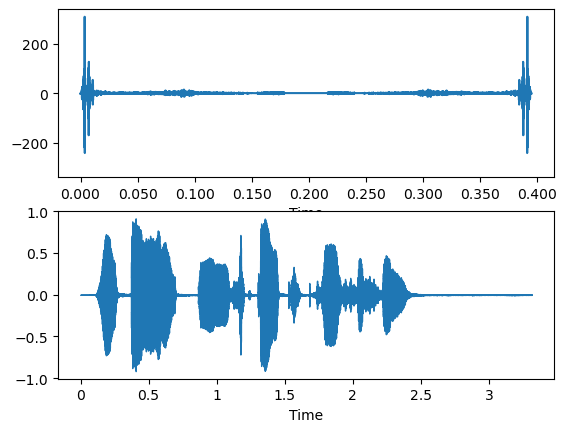

In [144]:
fig,ax = plt.subplots(2)
librosa.display.waveshow(segment.real,ax = ax[0])
librosa.display.waveshow(speech_signal,ax =ax[1])

In [165]:
window_length = 0.02
freq = 22500
samples = int(window_length*freq)
s = speech_signal[int(1*sr):int(1*sr)+samples]
s_fft = np.fft.fft(s)

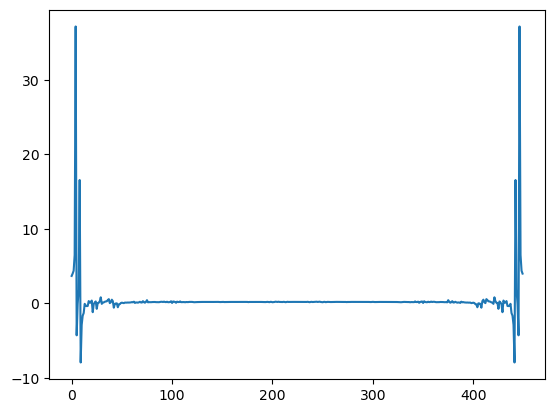

In [166]:
plt.plot(s_fft)

In [170]:
a = librosa.stft(speech_signal, n_fft=int(window_length*freq) );

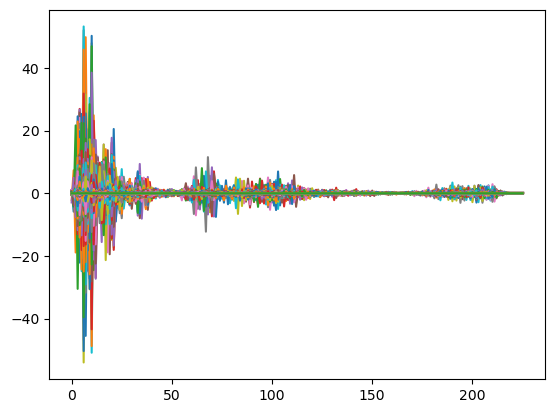

In [172]:
plt.plot(a);